<a href="https://colab.research.google.com/github/ActiveStacks/DatasetOne/blob/main/Final1_EXPERIMENT_BERTLLM_1E3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
#path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [ ]:
df = pd.read_csv(path3)

In [ ]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [ ]:
df.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"
...,...,...,...,...,...,...,...,...,...
3338684,3921494,webview,WARNING,Javascript enabled in Webview,browserWebview.getSettings().setJavaScriptEnab...,CWE-939,Improper Authorization in Handler for Custom U...,1,browserWebview.getSettings().setJavaScriptEnab...
3338706,3921518,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
3338707,3921519,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
3338708,3921520,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"


In [ ]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [ ]:
df.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
3338705,3921517,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,0,browserWebview.getSettings().setJavaScriptEnab...
3338706,3921518,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
3338707,3921519,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
3338708,3921520,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"
3338709,3921521,file,WARNING,Logging found,"Log.w(TAG, ""Native exit reason="" + reason);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + reason);"


In [ ]:
df.shape

(3338710, 9)

In [ ]:
df.describe()

,index,Vulnerability_status
count,3.338710e+06,3.338710e+06
mean,1.891658e+06,8.428704e-03
std,1.187006e+06,9.142026e-02
min,0.000000e+00,0.000000e+00
25%,8.346772e+05,0.000000e+00
50%,1.684286e+06,0.000000e+00
75%,2.983884e+06,0.000000e+00
max,3.921521e+06,1.000000e+00


In [ ]:
df.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,3338710
category,5
Severity,3
Description,26
Code,3315848
CWE_ID,14
CWE_Desc,14
Vulnerability_status,2
processed_code,3313829


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    3310569
1      28141
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [ ]:
df_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
3338701,3921513,NaN,NaN,NaN,String dns_message_encoded = Base64.encodeToSt...,NaN,NaN,0,String dns_message_encoded = Base64.encodeToSt...
3338702,3921514,NaN,NaN,NaN,if(doh_server_url.substring(doh_server_url.len...,NaN,NaN,0,if(doh_server_url.substring(doh_server_url.len...
3338703,3921515,NaN,NaN,NaN,if(record.getName().equals(Name.fromString(hos...,NaN,NaN,0,if(record.getName().equals(Name.fromString(hos...
3338704,3921516,NaN,NaN,NaN,response = record.rdataToString();,NaN,NaN,0,response = record.rdataToString();
3338705,3921517,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,0,browserWebview.getSettings().setJavaScriptEnab...


In [ ]:
df_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"


In [ ]:
df_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
3338684,3921494,webview,WARNING,Javascript enabled in Webview,browserWebview.getSettings().setJavaScriptEnab...,CWE-939,Improper Authorization in Handler for Custom U...,1,browserWebview.getSettings().setJavaScriptEnab...
3338706,3921518,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
3338707,3921519,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
3338708,3921520,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"
3338709,3921521,file,WARNING,Logging found,"Log.w(TAG, ""Native exit reason="" + reason);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + reason);"


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    28141
0    28141
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

index    category  Severity  Description               Code                                                                                                                                             CWE_ID   CWE_Desc                                          Vulnerability_status  processed_code                                                                    
3921521  file      WARNING   Logging found             Log.w(TAG, "Native exit reason=" + reason);                                                                                                      CWE-532  Insertion of Sensitive Information into Log File  1                     Log.w(TAG, "user_str" + reason);                                                      1
90       file      WARNING   Logging found             Log.w("ListPreference", "Setting a summary with a String formatting marker is no longer supported. You should use a SummaryProvider instead.");  CWE-532  Insertion of Sensitive Information into Log File  1       

<Axes: >

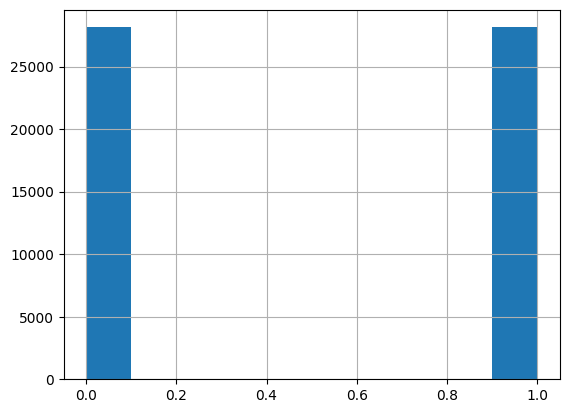

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,958687,file,INFO,Hardcoded HTTP url found,if (var1.length() == 2) {,CWE-312,Cleartext Storage of Sensitive Information,1,if (var1.length() == 2) {
1,3317193,file,WARNING,Logging found,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + ""onPr...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + ""user..."
2,1204923,NaN,NaN,NaN,if (parentCellLayoutForView != null) {,NaN,NaN,0,if (parentCellLayoutForView != null) {
3,1615719,file,WARNING,Logging found,"Log.w(tag, ((StringBuilder)note).toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(tag, ((StringBuilder)note).toString());"
4,2679374,file,INFO,Hardcoded HTTP url found,"public static final String REL_CONTENTS = ""con...",CWE-312,Cleartext Storage of Sensitive Information,1,"public static final String REL_CONTENTS = ""use..."


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,category,Vulnerability_status,processed_code
0,958687,file,1,if (var1.length() == 2) {
1,3317193,file,1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + ""user..."
2,1204923,NaN,0,if (parentCellLayoutForView != null) {
3,1615719,file,1,"Log.w(tag, ((StringBuilder)note).toString());"
4,2679374,file,1,"public static final String REL_CONTENTS = ""use..."
5,3318248,NaN,0,final Button btn = findViewById(R.id.Button01);
6,3196262,NaN,0,final int n7 = width + n - (z - d);
7,1349379,file,1,"Log.d((String)""user_str"", (String)iterator.toS..."
8,2076275,file,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
9,1196487,NaN,0,"this.addView((View)appsCustomizeCellLayout, (V..."


In [ ]:
df_balanced.tail(10)

,index,category,Vulnerability_status,processed_code
56272,1509765,file,1,"Log.e(DefaultRoboModule.class.getName(), ""user..."
56273,1476631,file,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
56274,884083,file,1,"public Integer call(Integer n, Object object) {"
56275,1286809,NaN,0,return ((g)f.e).getValue();
56276,3432603,NaN,0,schemeSpecificPart = input.substring(correctSc...
56277,457792,NaN,0,final int TextView_textSize;
56278,2210866,NaN,0,if (b.G != dimension2) {
56279,1955406,file,1,public void onClick(View view) {
56280,3690099,file,1,"public final static String REDDITURL = ""user_s..."
56281,2934198,NaN,0,import i0.class_102;


In [ ]:
df_balanced.dropna()

,index,category,Vulnerability_status,processed_code
0,958687,file,1,if (var1.length() == 2) {
1,3317193,file,1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + ""user..."
3,1615719,file,1,"Log.w(tag, ((StringBuilder)note).toString());"
4,2679374,file,1,"public static final String REL_CONTENTS = ""use..."
7,1349379,file,1,"Log.d((String)""user_str"", (String)iterator.toS..."
...,...,...,...,...
56272,1509765,file,1,"Log.e(DefaultRoboModule.class.getName(), ""user..."
56273,1476631,file,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
56274,884083,file,1,"public Integer call(Integer n, Object object) {"
56279,1955406,file,1,public void onClick(View view) {


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,if (var1.length() == 2) {,1
1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + ""user...",1
2,if (parentCellLayoutForView != null) {,0
3,"Log.w(tag, ((StringBuilder)note).toString());",1
4,"public static final String REL_CONTENTS = ""use...",1


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,if (var1.length() == 2) {,1
1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + ""user...",1
2,if (parentCellLayoutForView != null) {,0
3,"Log.w(tag, ((StringBuilder)note).toString());",1
4,"public static final String REL_CONTENTS = ""use...",1


In [ ]:
df_balanced.head(5)

,text,labels
0,if (var1.length() == 2) {,1
1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + ""user...",1
2,if (parentCellLayoutForView != null) {,0
3,"Log.w(tag, ((StringBuilder)note).toString());",1
4,"public static final String REL_CONTENTS = ""use...",1


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset, DatasetDict

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 56282
    })
})

In [ ]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [ ]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 33769
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 11257
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 11256
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/33769 [00:00<?, ? examples/s]

Map:   0%|          | 0/11257 [00:00<?, ? examples/s]

Map:   0%|          | 0/11256 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                       Param #
BertForSequenceClassification                                --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   23,440,896
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Dropout: 1-2                                               --
├─L

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-59-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.187400,0.208953,{'accuracy': 0.9417199715707179},{'recall': 0.9408583391486393},{'precision': 0.9444833625218915},{'f1': 0.942667365845132}
2,0.154800,0.171743,{'accuracy': 0.9516702203269367},{'recall': 0.9412072575017446},{'precision': 0.9630489111031775},{'f1': 0.9520028233633315}
3,0.110600,0.185842,{'accuracy': 0.9507818052594172},{'recall': 0.9548150732728542},{'precision': 0.9488557558945908},{'f1': 0.9518260869565217}
4,0.076600,0.198152,{'accuracy': 0.9537135749822317},{'recall': 0.9541172365666434},{'precision': 0.9549502357255107},{'f1': 0.9545335544113797}


Trainer is attempting to log a value of "{'accuracy': 0.9417199715707179}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9408583391486393}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9444833625218915}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.942667365845132}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9516702203269367}" of type <class '

TrainOutput(global_step=8444, training_loss=0.13863286967528257, metrics={'train_runtime': 3081.8592, 'train_samples_per_second': 43.829, 'train_steps_per_second': 2.74, 'total_flos': 3.553998891380736e+16, 'train_loss': 0.13863286967528257, 'epoch': 4.0})

In [ ]:
outcome= trainer.predict(tokenized_datasets['test'])

In [ ]:
print(outcome.metrics)

{'test_loss': 0.19032038748264313, 'test_accuracy': {'accuracy': 0.9560273607533091}, 'test_recall': {'recall': 0.9591654778887304}, 'test_precision': {'precision': 0.9528786536758193}, 'test_f1': {'f1': 0.9560117302052786}, 'test_runtime': 74.2197, 'test_samples_per_second': 151.671, 'test_steps_per_second': 2.371}
